In [ ]:
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit

import matplotlib.axes as axes
import matplotlib.pyplot as plt
# from google.colab import files

import pandas as pd
import glob
import os

import scipy

# from google.colab import drive
# drive.mount('/content/drive')

We download the data from Github

In [2]:
!rm -rf physics191_plasma

In [3]:
!git clone https://github.com/jorgegponce/physics191_plasma.git

Cloning into 'physics191_plasma'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (259/259), done.
remote: Compressing objects: 100% (250/250), done.
remote: Total 259 (delta 22), reused 246 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (259/259), 3.21 MiB | 10.62 MiB/s, done.
Resolving deltas: 100% (22/22), done.


# Paschen Curve

## Expected Curve


$$
V_\text{breakdown} = \frac{B p d}{\ln(A pd) - \ln(\ln(1+\frac{1}{\gamma}))}
$$

For our experiment, we will use the following constants:

$$
A = 12 \, {\text{cm}^{-1} \text{Torr}^{-1}}, \; B = 180 \,{V \text{cm}^{-1} \text{Torr}^{-1}},  \; d = 5.664 \, \text{cm}, \; \gamma = 0.02
$$

In [ ]:
# Experimental constants
A = 12
B = 180
d = 2.35
# d = 5.5
gamma = 0.02

ps = np.linspace(140e-3, 2000e-3, 500)

Vs = B * ps * d / (np.log(A*ps*d) - np.log(np.log(1 + 1/gamma)))

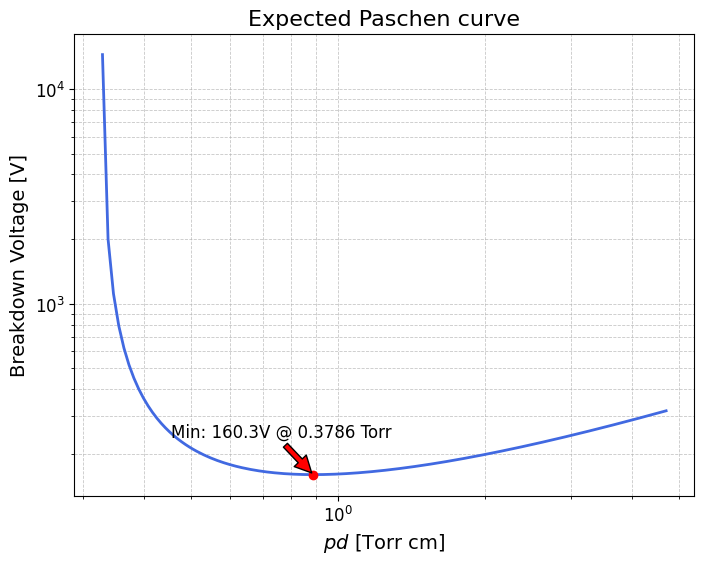

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ps*d, Vs, color="royalblue", linewidth=2, linestyle="-", label="Paschen's Law")

plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$pd$ [Torr cm]", fontsize=14)
plt.ylabel("Breakdown Voltage [V]", fontsize=14)
plt.title("Expected Paschen curve", fontsize=16)


plt.grid(True, which="both", linestyle="--", linewidth=0.6, alpha=0.7)
plt.minorticks_on()
plt.tick_params(axis="both", which="major", labelsize=12)

# Annotate Minimum Point (Optional)
min_idx = np.argmin(Vs)
plt.scatter(ps[min_idx]*d, Vs[min_idx], color="red", zorder=3)
plt.annotate(f"Min: {Vs[min_idx]:.1f}V @ {ps[min_idx]:.4f} Torr",
             xy=(ps[min_idx]*d, Vs[min_idx]),
             xytext=(ps[min_idx]*1.2, Vs[min_idx]*1.5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12)

# plt.legend(fontsize=12, loc="best")

# Show
plt.show()

## Importing data

In [ ]:
directory = "/content/physics191_plasma/athalia and jorge's data/paschen2.0"

# Find all "mtorr_neg.txt" files
neg_files = glob.glob(os.path.join(directory, "*mtorr_neg.txt"))

# Load each file into a DataFrame and store in a dictionary
dataframes = {}
for file in neg_files:
    df = pd.read_csv(file, delimiter="\t", header=None, names=["Current", "Voltage", "Time"])
    dataframes[os.path.basename(file)] = df

# Preview the datasets (uncomment if needed)
# for filename, df in dataframes.items():
#     print(f"Preview of {filename}:")
#     print(df.head())


### Plots


We first inspect one data point

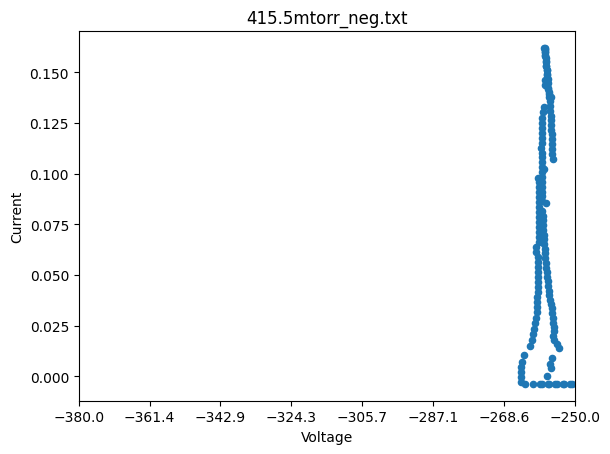

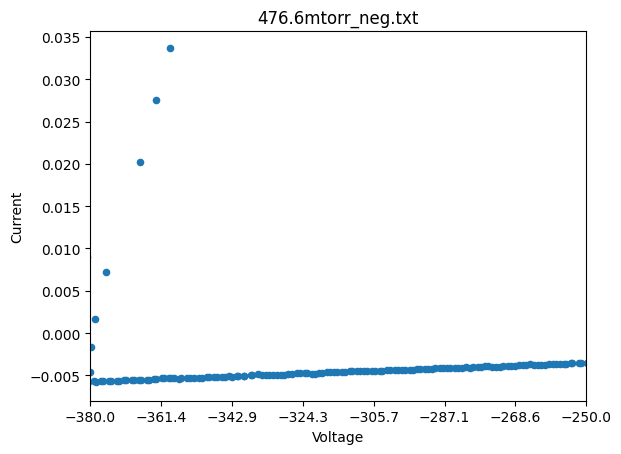

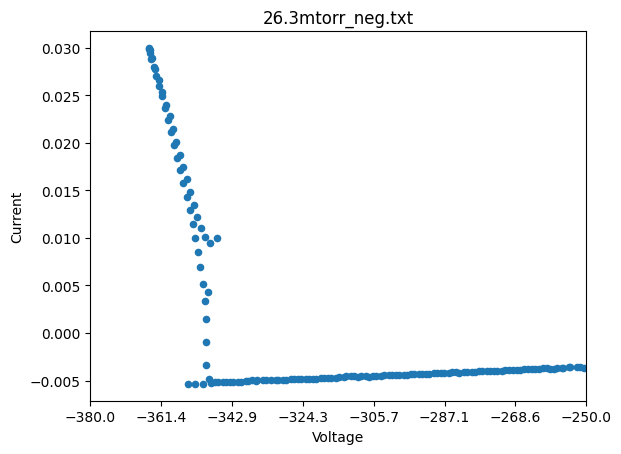

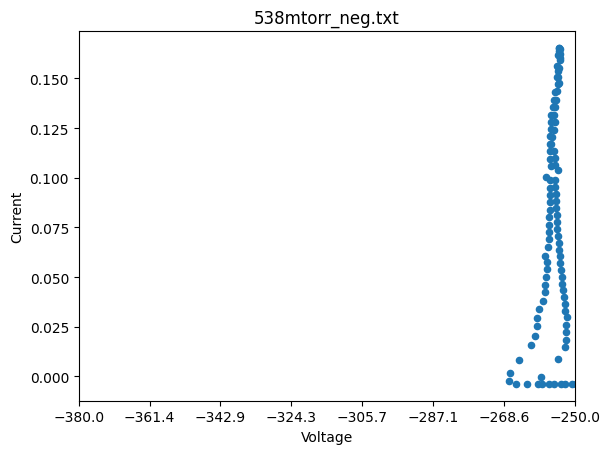

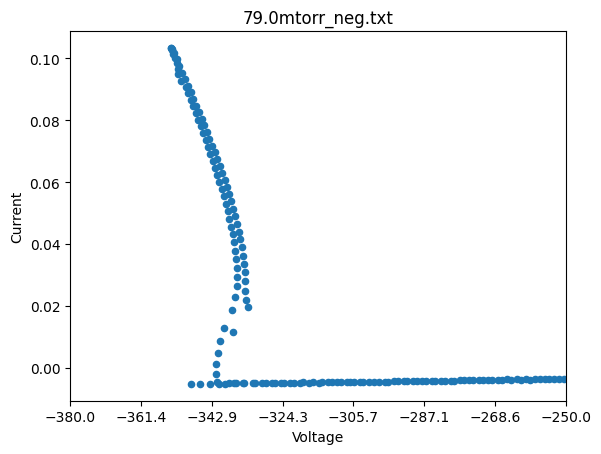

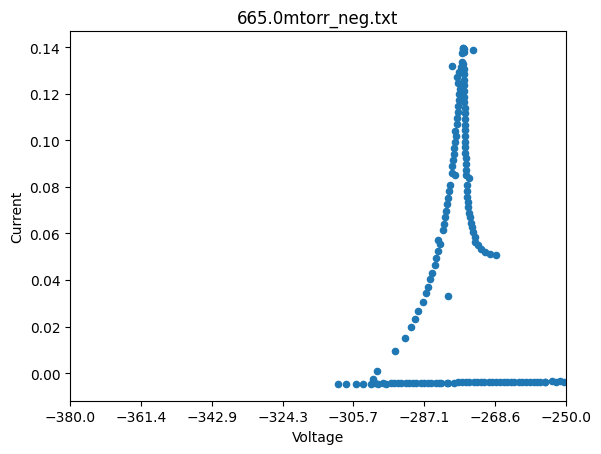

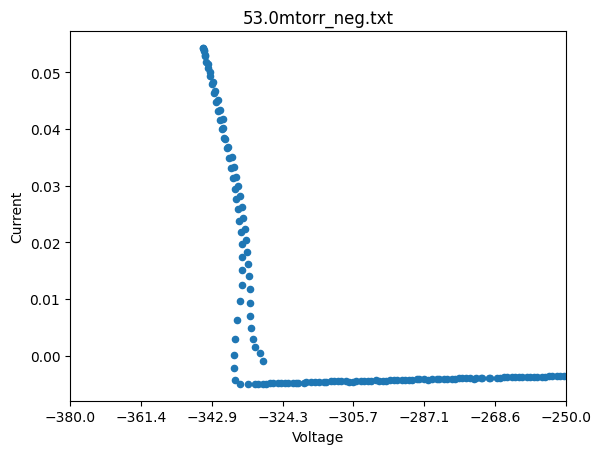

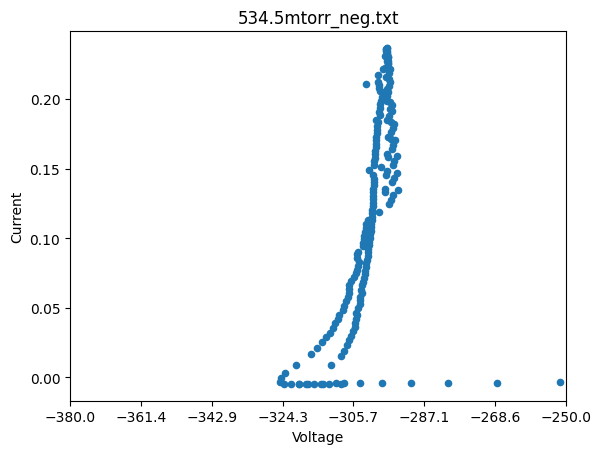

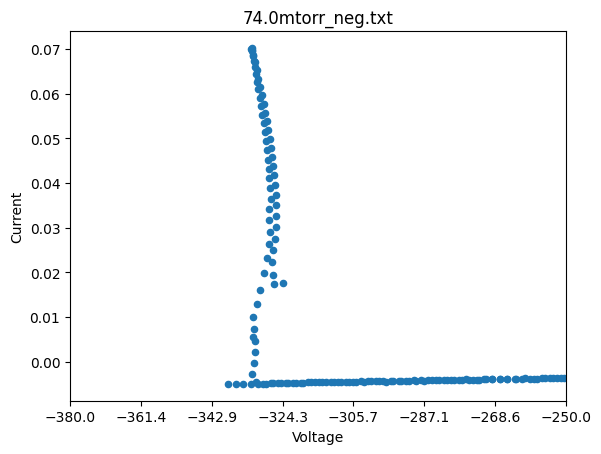

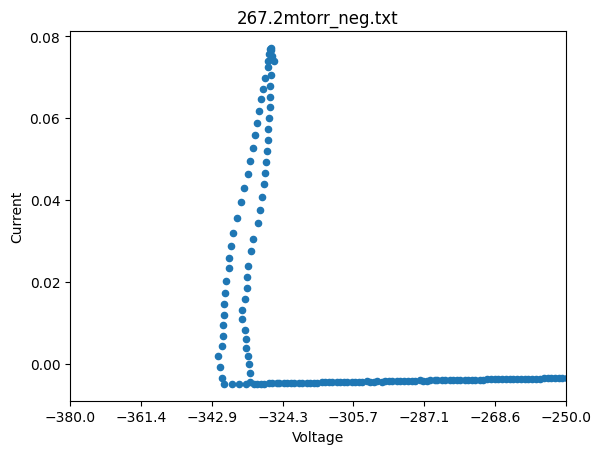

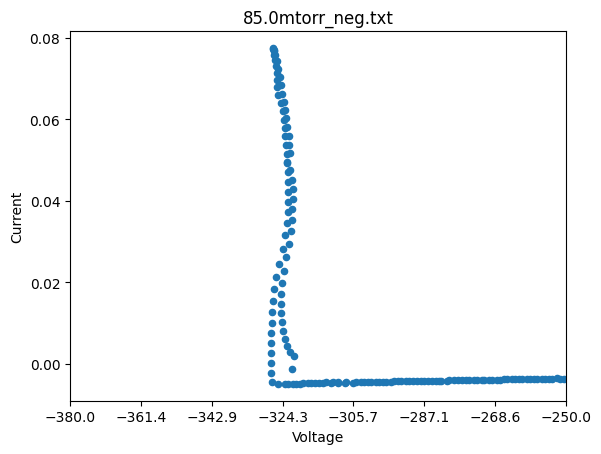

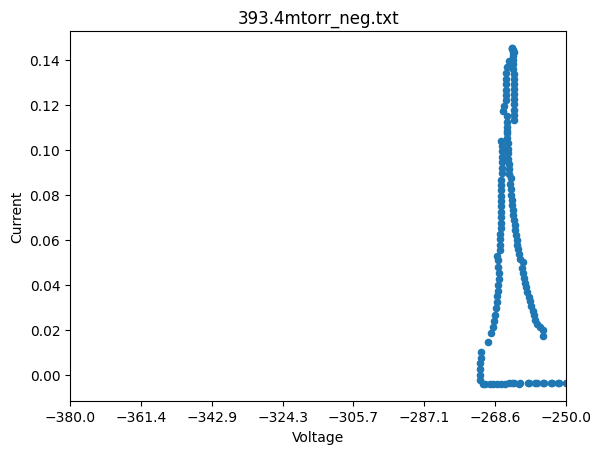

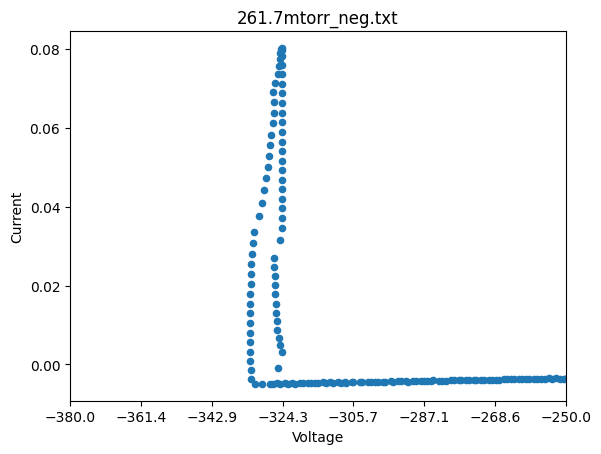

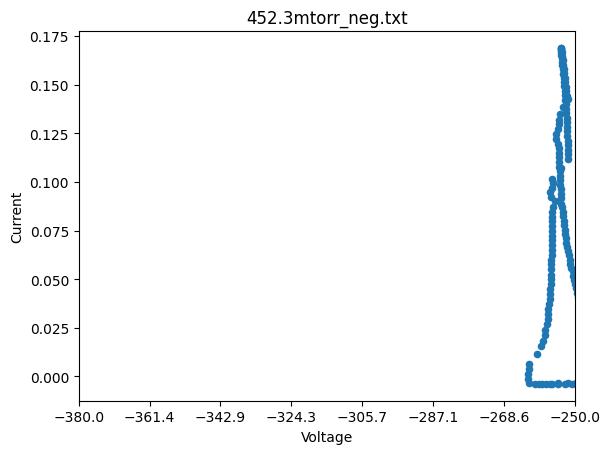

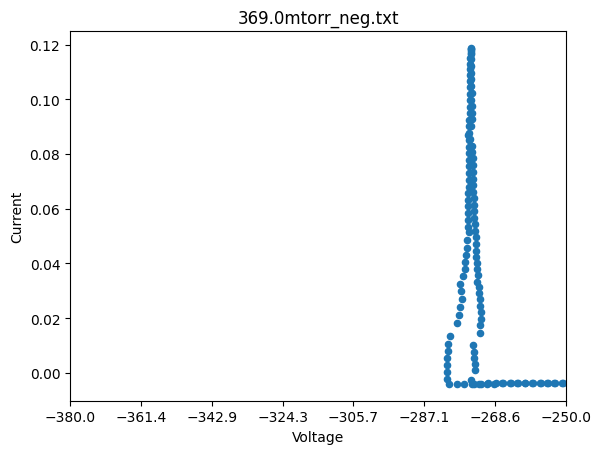

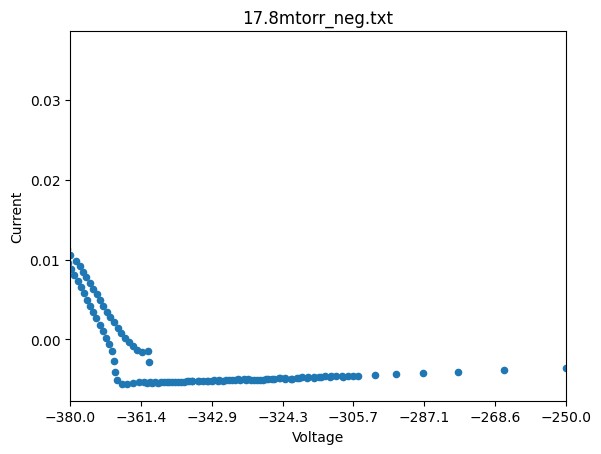

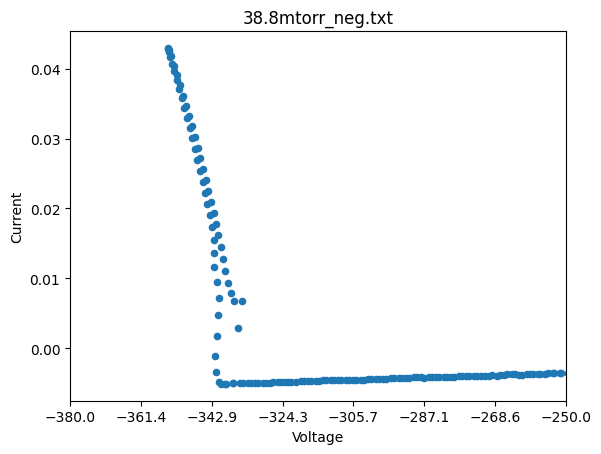

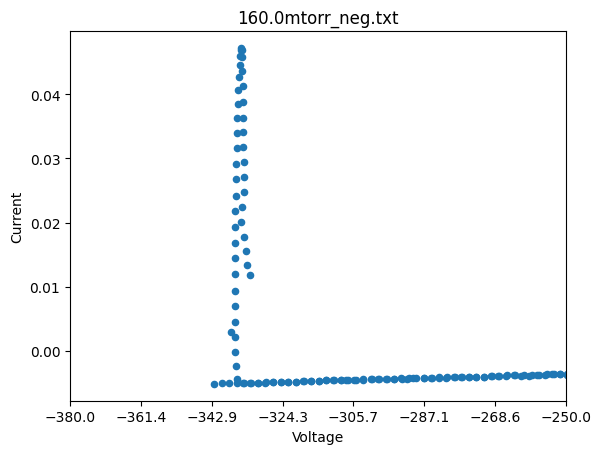

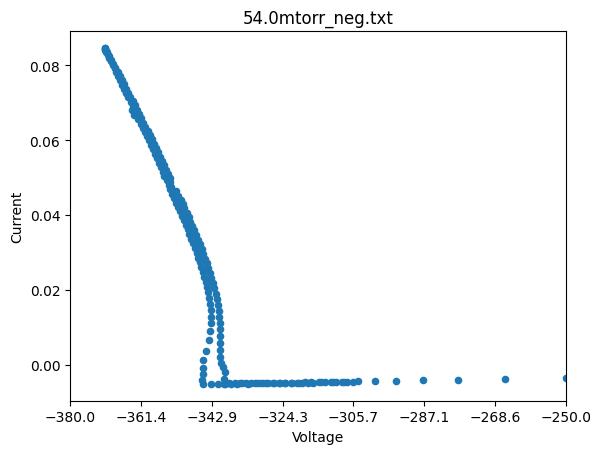

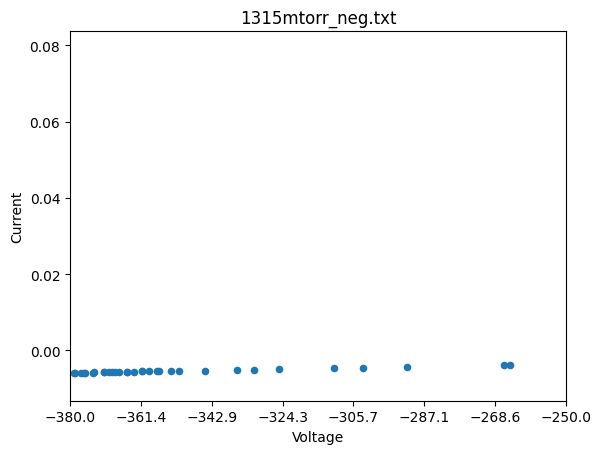

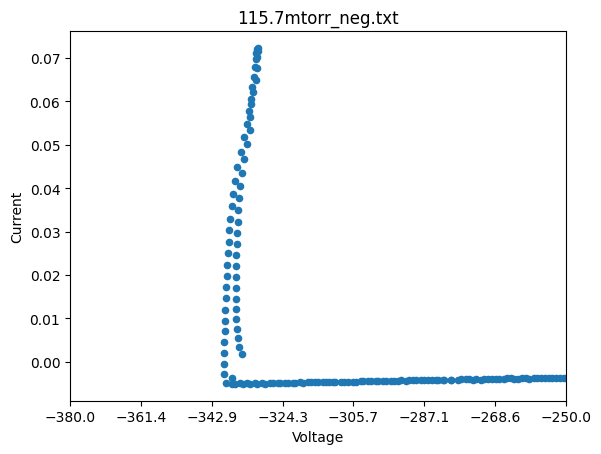

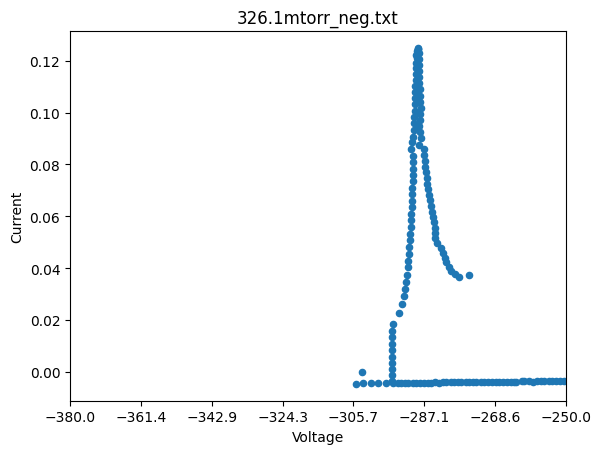

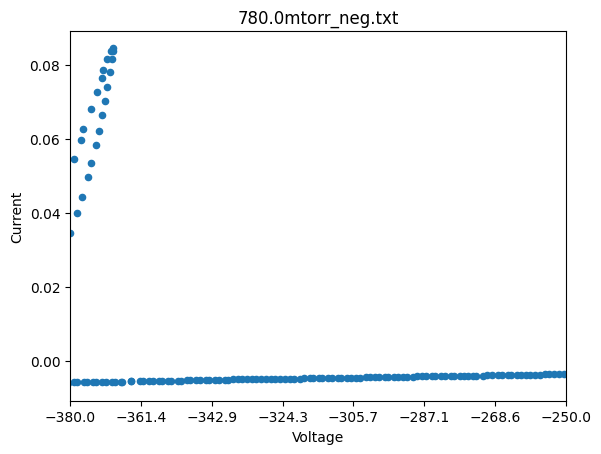

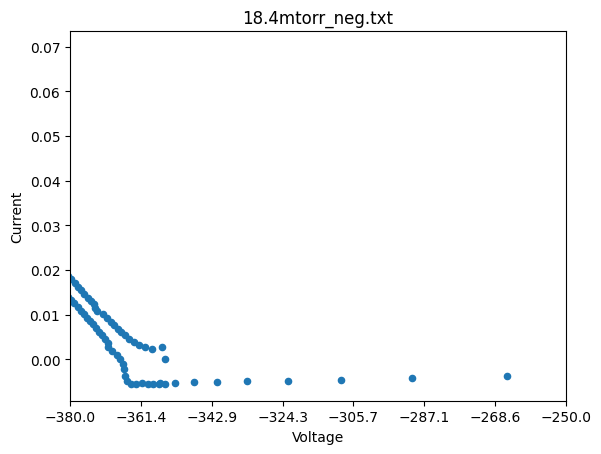

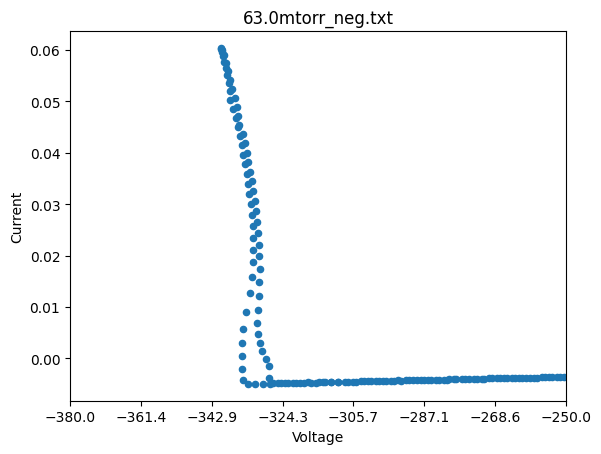

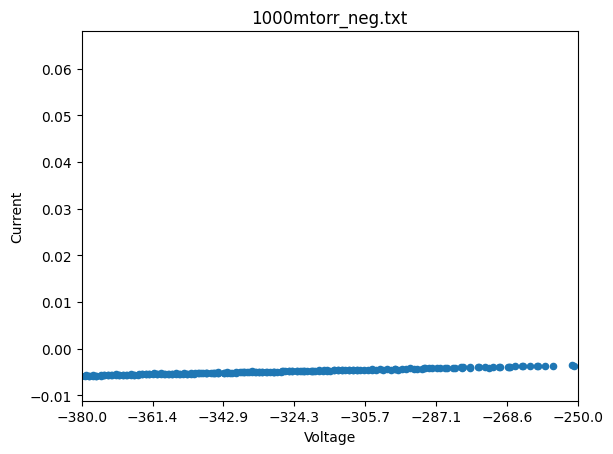

In [ ]:

for key, item in dataframes.items():
  item.plot(x='Voltage', y='Current', kind='scatter')
  plt.xlim(-380, -250)
  plt.title(key)
  plt.xticks(np.linspace(-380, -250, 8))
  plt.show()
  # sample_data = dataframes['267.9mtorr_neg.txt']

  # sample_data.plot(x='Voltage', y='Current', kind='scatter')
  # plt.xlim(-380, -300)
  # plt.show()

In [ ]:
# Compute derivative of Col2 (Current) with respect to Col3 (Voltage)
derivatives = np.gradient(sample_data["Current"], sample_data["Voltage"])
second_derivatives = np.gradient(derivatives, sample_data["Voltage"])


plt.plot(sample_data['Voltage'], second_derivatives)
plt.show()

NameError: name 'sample_data' is not defined

In [ ]:
# Define a threshold
threshold = 1

# Find indices where the derivative exceeds the threshold
jump_indices = np.where(derivatives > threshold)[0]  # Returns indices where condition is met

if jump_indices.size > 0:
    first_jump_index = jump_indices[0]  # Get first occurrence
    breakdown_voltage = sample_data["Voltage"].iloc[first_jump_index]
    print(f"First breakdown voltage: {breakdown_voltage:.3f} V")
else:
    print("No significant jump found.")

NameError: name 'derivatives' is not defined

In [ ]:
def get_breakdown_voltage(df, threshold = 0.01):

  # Compute derivative of Current with respect to Voltage
  derivatives = np.gradient(df["Current"], df["Voltage"])

  # Find indices where the derivative exceeds the threshold
  jump_indices = np.where(derivatives > threshold)[0]  # Returns indices where condition is met

  if jump_indices.size > 0:
      first_jump_index = jump_indices[0]  # Get first occurrence
      breakdown_voltage = df["Voltage"].iloc[first_jump_index]
      return breakdown_voltage
  else:
      return 0



In [ ]:
breakdown_voltages = []
pressures = []

for key, item in dataframes.items():
  #item.plot(x='Voltage', y='Current', kind='scatter')
  # Remove "mtorr_neg.txt" and convert the remaining number to float
  pressure = float(key.replace("mtorr_neg.txt", ""))*1e-3
  breakdown_voltage = get_breakdown_voltage(item)

  pressures.append(pressure)
  breakdown_voltages.append(-breakdown_voltage)


pressures = np.array(pressures)
breakdown_voltages = np.array(breakdown_voltages)

In [ ]:
breakdown_voltages

array([255.75043 , 380.133599, 349.632297, 252.448599, 351.62692 ,
       275.847078, 334.968291, 305.035562, 327.167258, 334.924108,
       321.361579,   4.614531, 324.450829, 250.434774, 272.62997 ,
         0.      , 342.299004,   4.706702, 339.664076, 416.651443,
       336.616563, 305.172242,   0.      ,   0.      , 330.968096,
       433.164175])

In [ ]:
d

2.35

In [ ]:


def paschen_func(pd, A, B, gamma):
    # pd is the product pressure * distance
    return (B * pd) / (np.log(A * pd) - np.log(np.log(1 + 1/gamma)))


<ipython-input-60-bfa514c72384>:3: RuntimeWarning: invalid value encountered in log
  return (B * pd) / (np.log(A * pd) - np.log(np.log(1 + 1/gamma)))


Fitted parameters:
A = 392.5703091525419
B = 829.2384656194423
gamma = 5.136898057138515e-10


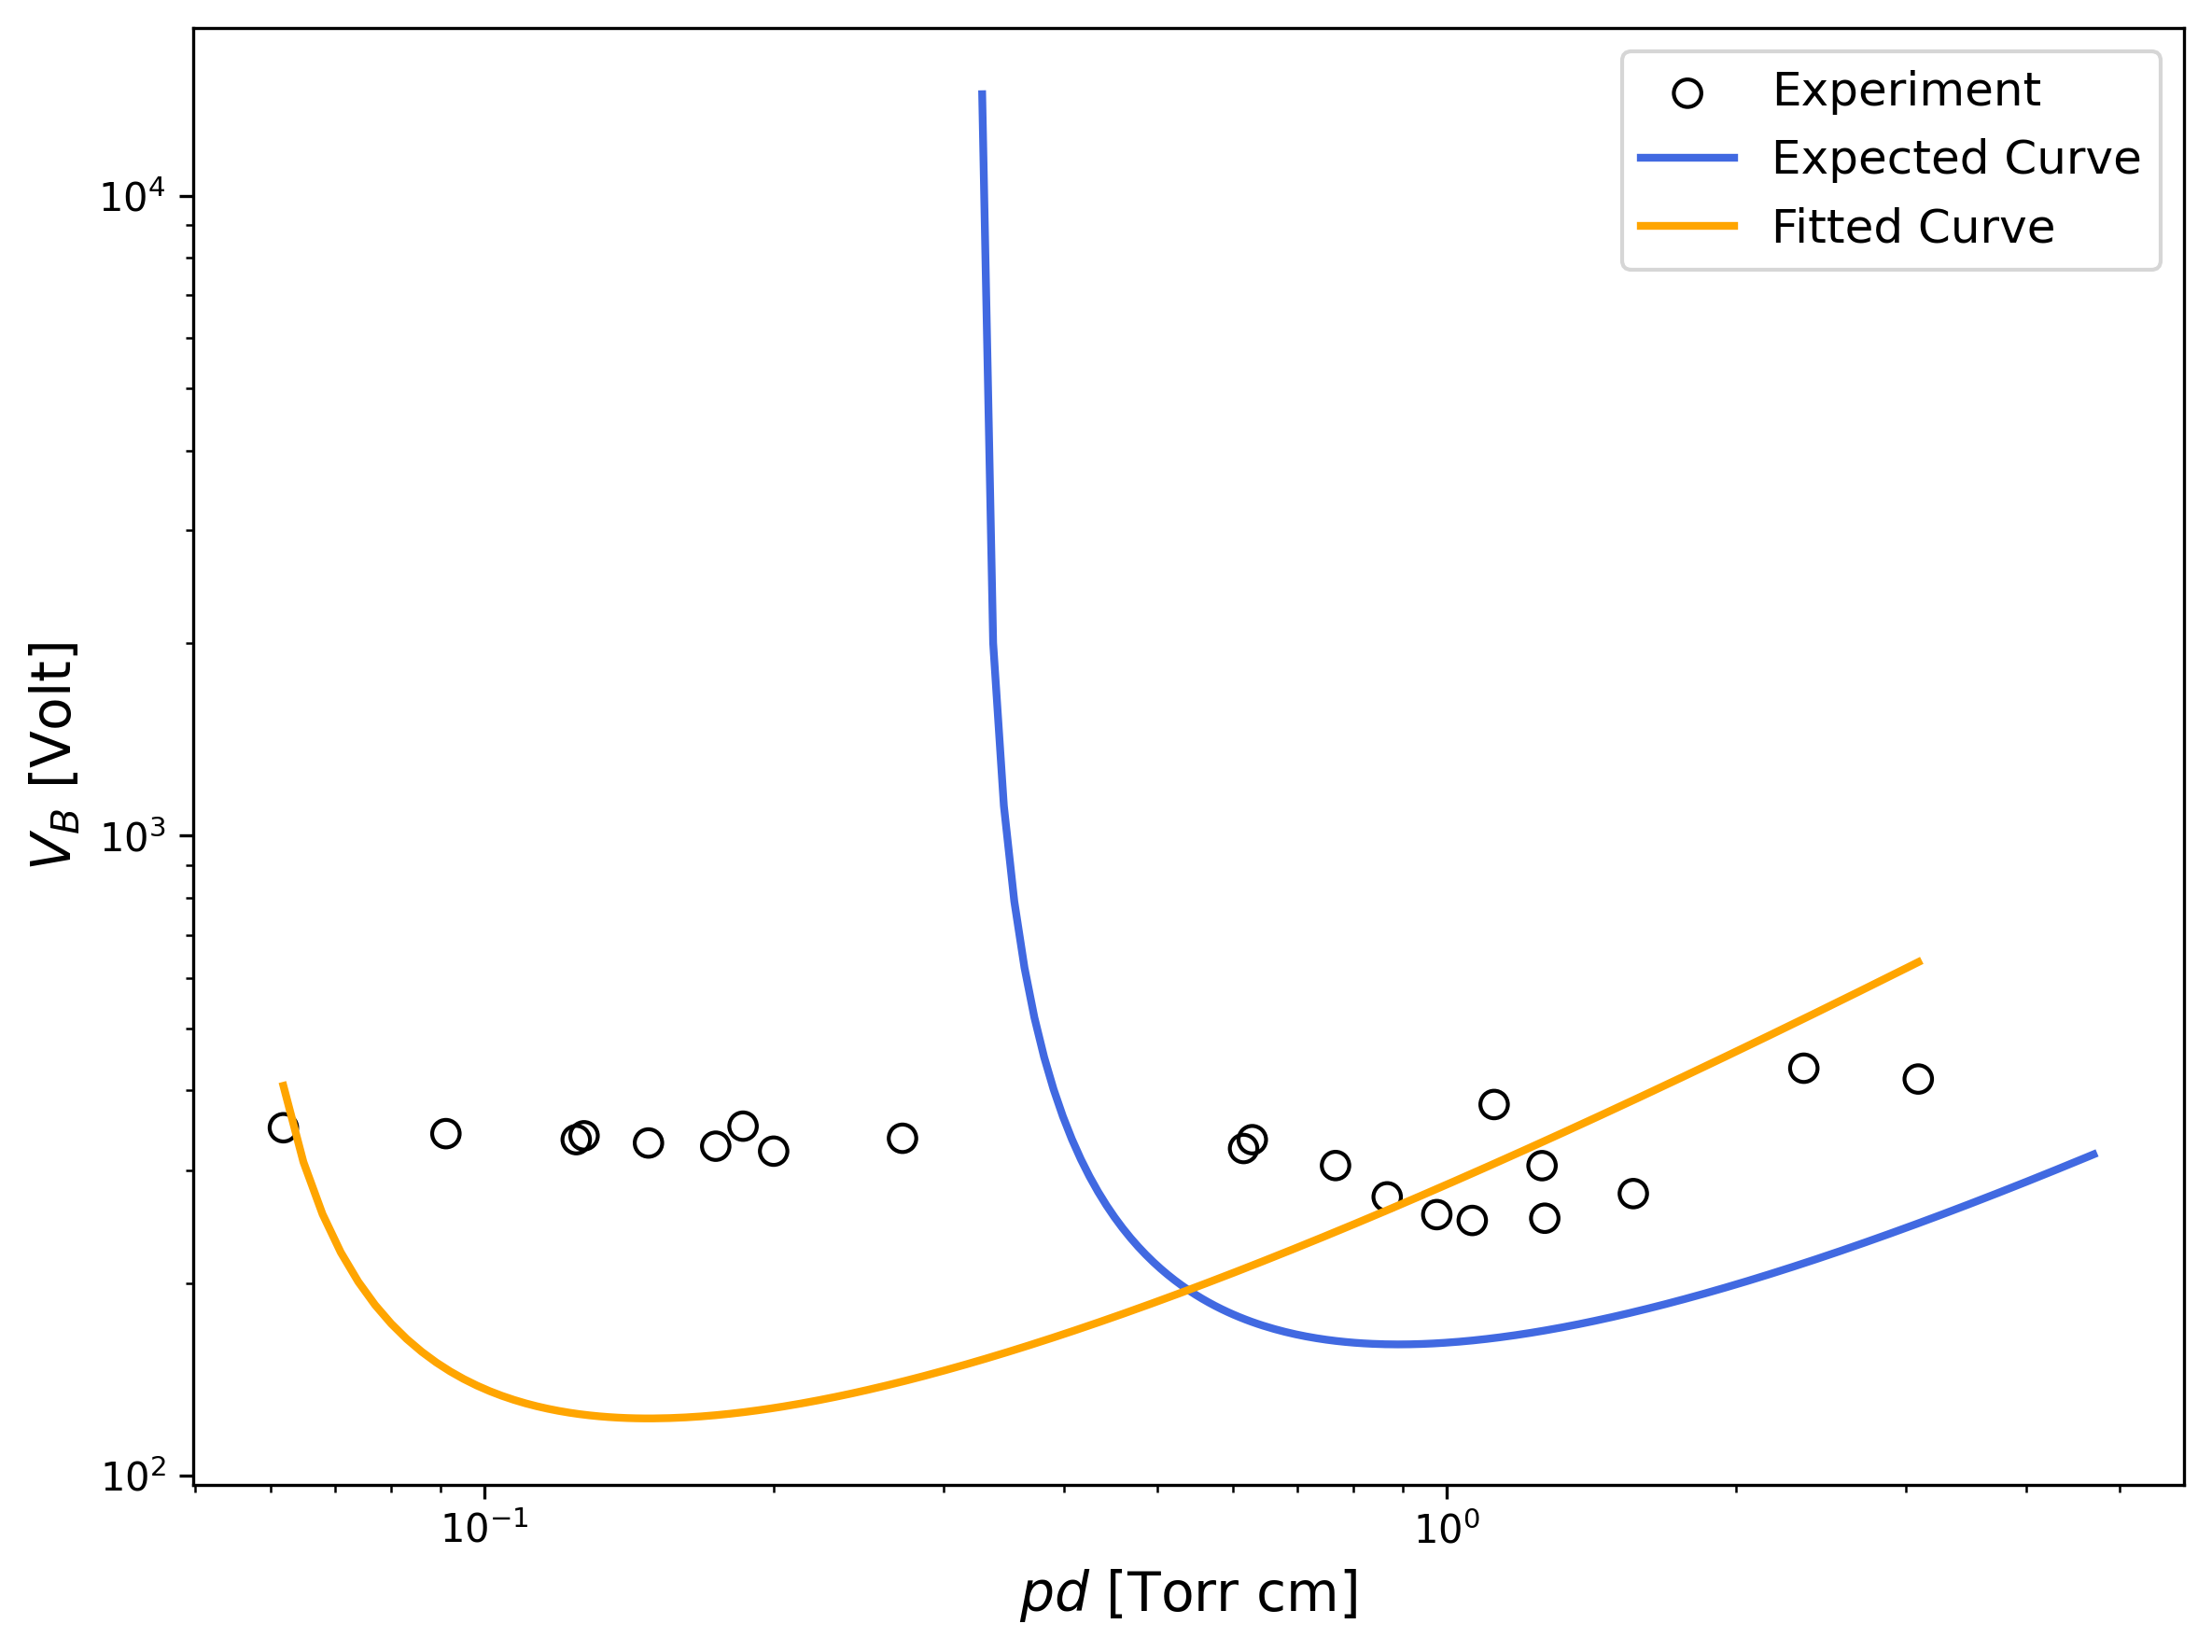

In [ ]:
voltage_mask = breakdown_voltages > 100
pressure_mask = pressures > 0.0


xdata = pressures[voltage_mask] * d
ydata = breakdown_voltages[voltage_mask]

# we want to fit the experimental data, but only the data for large enough p

x_fit = pressures[voltage_mask & pressure_mask] * d
y_fit = breakdown_voltages[voltage_mask & pressure_mask]

# Initial guesses for the parameters [A, B, gamma]:
initial_guesses = [1e3, 1e2, 0.01]

# Fit the model to the filtered data:
params, covariance = curve_fit(paschen_func, xdata, ydata, p0=initial_guesses)
A_fit, B_fit, gamma_fit = params

print("Fitted parameters:")
print("A =", A_fit)
print("B =", B_fit)
print("gamma =", gamma_fit)

# Generate data for the fitted curve for plotting:
x_pred = np.linspace(np.min(x_fit), np.max(x_fit), 1000)
# Change: Use x_pred instead of x_fit to generate y_pred
y_pred = paschen_func(x_pred, *params)





# Create a high-resolution figure suitable for publication
plt.figure(figsize=(8, 6), dpi=300)

# Plot experimental data using unfilled circle markers with black edges
plt.scatter(xdata,
            ydata,
            label='Experiment',
            marker='o', facecolors='none', edgecolors='black', s=50)

# Label the axes with LaTeX formatting and increased font size
plt.xlabel(r"$pd$ [Torr cm]", fontsize=14)
plt.ylabel(r"$V_B$ [Volt]", fontsize=14)

# Plot the expected curve with a solid blue line
plt.plot(ps * d, Vs, color="royalblue", linewidth=2, linestyle="-", label="Expected Curve")

plt.plot(x_pred, y_pred, color="orange", linewidth=2, linestyle="-", label="Fitted Curve")

# Set both axes to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Place the legend in the best location with a readable font size
plt.legend(loc='best', fontsize=12)

# Adjust layout to ensure no overlap of labels and elements
plt.tight_layout()

# Save the figure as a vector PDF for high-quality reproduction
plt.savefig("paschen_curve.pdf", format="pdf")

plt.show()


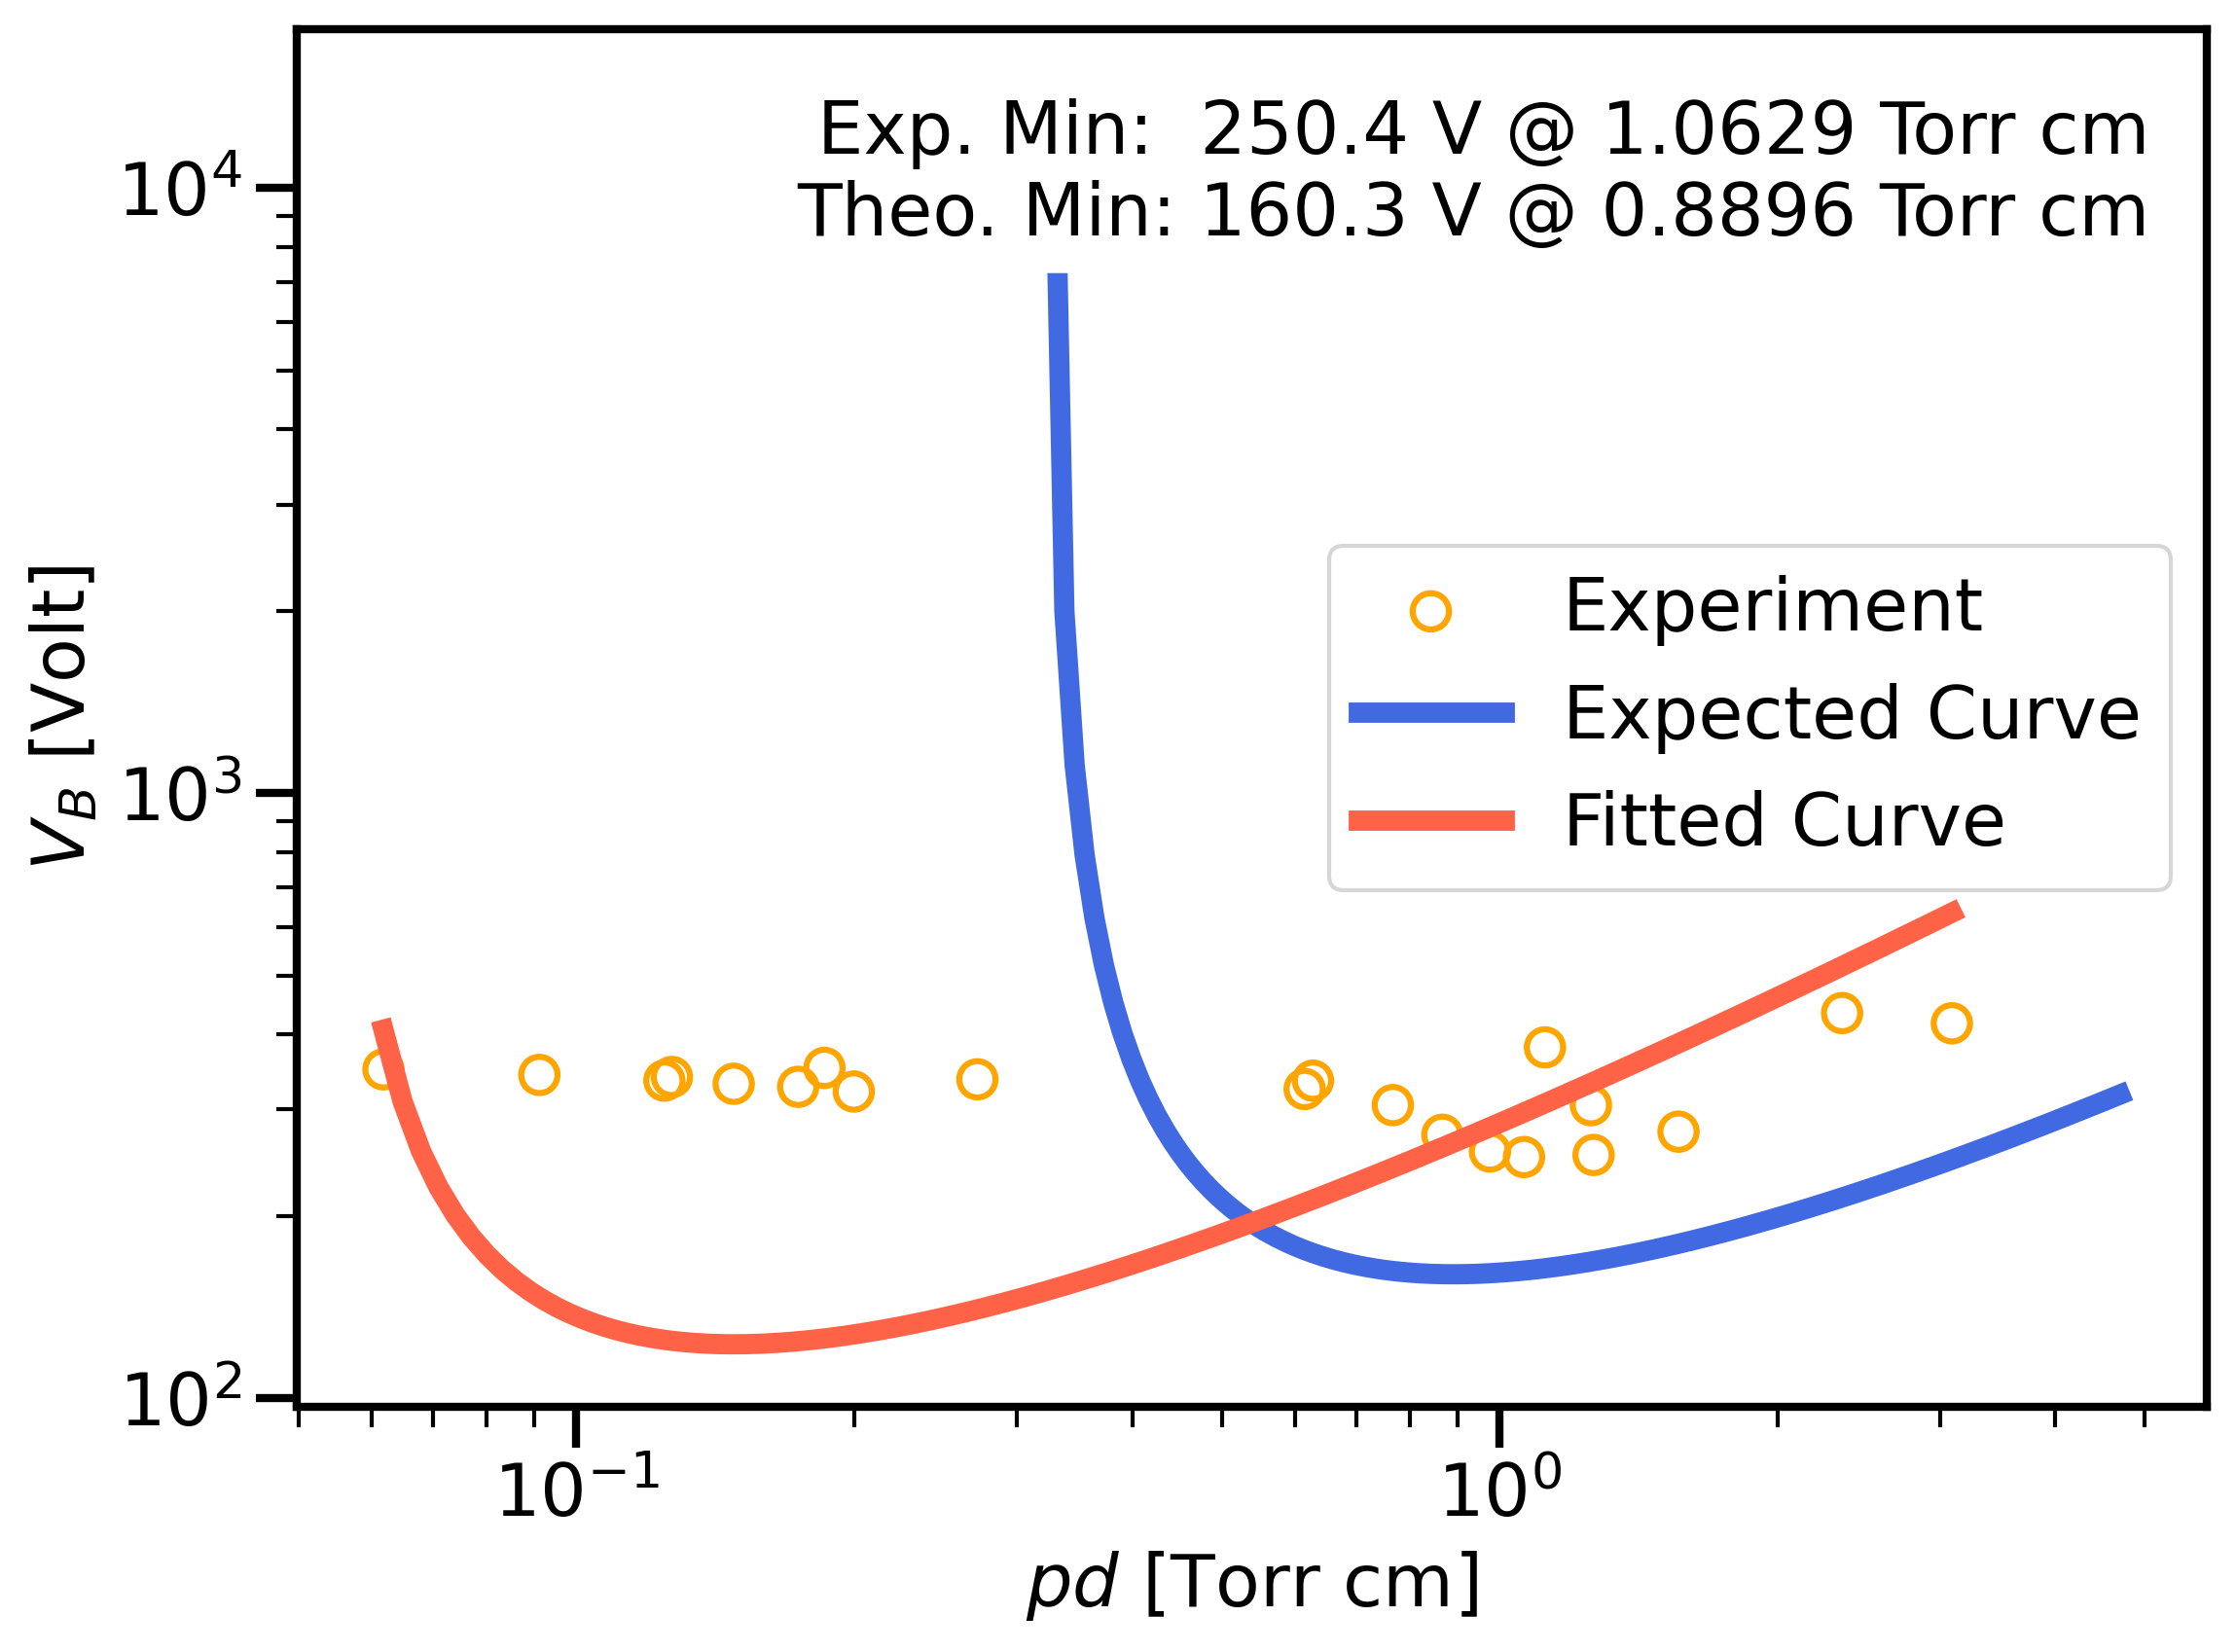

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# -------------------------------------------------
# Find minima
# -------------------------------------------------
idx_exp_min = np.argmin(ydata)
x_exp_min = xdata[idx_exp_min]
y_exp_min = ydata[idx_exp_min]

idx_theo_min = np.argmin(Vs)
x_theo_min = (ps * d)[idx_theo_min]
y_theo_min = Vs[idx_theo_min]

# -------------------------------------------------
# Matplotlib settings for thicker lines & bigger fonts
# -------------------------------------------------
plt.rcParams.update({
    'font.size': 18,          # Default text size
    'axes.labelsize': 18,     # Axis label size
    'axes.titlesize': 18,
    'legend.fontsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'lines.linewidth': 5,     # Thicker lines by default
    'lines.markersize': 9,
    'axes.linewidth': 2,
    'xtick.major.size': 10,
    'xtick.major.width': 2,
    'ytick.major.size': 10,
    'ytick.major.width': 2,
    'xtick.minor.size': 5,
    'xtick.minor.width': 1,
    'ytick.minor.size': 5,
    'ytick.minor.width': 1
})

# -------------------------------------------------
# Plot
# -------------------------------------------------
plt.figure(figsize=(8, 6), dpi=300)

# 1) Experimental data (change color from black to something else, e.g. 'forestgreen')
plt.scatter(
    xdata, ydata,
    label='Experiment',
    marker='o',
    facecolors='none',
    edgecolors='orange',  # A green hue
    s=80,
    linewidth=1.5
)

# 2) Theoretical curve (royalblue)
plt.plot(ps * d, Vs, color="royalblue", linestyle="-", label="Expected Curve")

# 3) Fitted curve (change from orange to something else, e.g. 'tomato')
plt.plot(x_pred, y_pred, color="tomato", linestyle="-", label="Fitted Curve")

# Axes labels
plt.xlabel(r"$pd$ [Torr cm]")
plt.ylabel(r"$V_B$ [Volt]")

# Log scales
plt.xscale('log')
plt.yscale('log')

# -------------------------------------------------
# Single text box showing both minima (no arrows)
# -------------------------------------------------
min_info = (
    f"Exp. Min:  {y_exp_min:.1f} V @ {x_exp_min:.4f} Torr cm\n"
    f"Theo. Min: {y_theo_min:.1f} V @ {x_theo_min:.4f} Torr cm"
)

plt.text(
    0.97, 0.95, min_info,            # (x, y) in axes-fraction coordinates
    transform=plt.gca().transAxes,
    fontsize=18,
    color='black',                   # Black text
    va='top',                        # Align text by its top
    ha='right',                      # Align text to the right
    bbox=dict(
        boxstyle="round,pad=0.3",
        fc="white",                  # White background
        ec="none",                   # No edge color
        lw=0                         # No border line width
    )
)

# plt.text(
#     0.02, 200,  # Adjust these coordinates as needed
#     r"$V_\text{breakdown} = \frac{B\,p\,d}{\ln(A\,p\,d)\;-\;\ln(\ln(1 + \frac{1}{\gamma}))}$",
#     color='royalblue',
#     fontsize=14
# )

# Legend, layout, etc.
plt.legend(loc='best')
plt.tight_layout()

# Save if desired
plt.savefig("paschen_curve.pdf", format="pdf")

plt.show()

# Langmuir


In [5]:
directory = "/content/physics191_plasma/athalia and jorge's data/langmuir/"


df = pd.read_csv(directory+'1400V sweep -50 to -10.txt')


In [13]:
def load_langmuir_data(file_path):
    """
    Load plasma data from file, extracting only the first section with 5 columns.

    Parameters:
    -----------
    file_path : str
        Path to the data file

    Returns:
    --------
    pandas.DataFrame
        DataFrame containing the 5 columns of data
    """
    # Read file line by line
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Find the first empty line
    empty_line_index = -1
    for i, line in enumerate(lines):
        if line.strip() == '':
            empty_line_index = i
            break

    # Handle case where no empty line was found
    if empty_line_index == -1:
        print("Warning: No empty line found. Using all lines in the file.")
        data_lines = lines
    else:
        data_lines = lines[:empty_line_index]

    # Parse the data
    data = []
    skipped_lines = 0

    # Try to detect if we need to handle different line formats
    if len(data_lines) > 0:
        sample_line = data_lines[0].strip()
        if sample_line.endswith(','):
            print("Detected lines ending with commas. Will remove trailing commas.")
        else:
            print("Lines do not end with commas.")

    for line in data_lines:
        # Remove trailing comma if present
        clean_line = line.rstrip(',\r\n')
        # Split by comma
        values = clean_line.split(',')

        # Filter out empty strings and convert to float
        # If there's an empty value, replace with NaN
        float_values = []
        for val in values:
            if val.strip():  # Check if the value is not just whitespace
                float_values.append(float(val))
            else:
                float_values.append(float('nan'))

        # Only take the first 5 columns (pad with NaN if fewer than 5)
        while len(float_values) < 5:
            float_values.append(float('nan'))

        # Skip lines that would cause problems (all NaN or empty)
        if not all(np.isnan(val) for val in float_values[:5]):
            data.append(float_values[:5])
        else:
            skipped_lines += 1

    # Create DataFrame
    df = pd.DataFrame(data, columns=[
        'Voltage (V)',  # Based on the first column values
        'Current (A)',  # Small values in scientific notation
        'Unknown1',     # Large values with scientific notation
        'Unknown2',     # Values around 4130-4190
        'Unknown3'      # Constant values at 21508
    ])

    if skipped_lines > 0:
        print(f"Warning: Skipped {skipped_lines} lines that were empty or could not be parsed.")

    return df

In [20]:

df = load_langmuir_data(directory+'216.9mtorr 800V sweep -70 to +20.txt.txt')

Detected lines ending with commas. Will remove trailing commas.


In [24]:
directory = "/content/physics191_plasma/athalia and jorge's data/langmuir"

# Find all "mtorr_neg.txt" files
neg_files = glob.glob(os.path.join(directory, "*.txt"))

# Load each file into a DataFrame and store in a dictionary
dataframes = {}
for file in neg_files:
    try:
        df = load_langmuir_data(file)
        dataframes[os.path.basename(file)] = df
    except Exception as e:
        print(f"Skipping {os.path.basename(file)}: {e}")
        continue


Detected lines ending with commas. Will remove trailing commas.
Lines do not end with commas.
Skipping 489.0mtorr 1800V sweep -20 to 20.txt: could not convert string to float: '\x1e-2.000000E+01'
Detected lines ending with commas. Will remove trailing commas.
Skipping 489.0mtorr 1400V sweep -20 to 20.txt: 'utf-8' codec can't decode byte 0xf0 in position 0: invalid continuation byte
Detected lines ending with commas. Will remove trailing commas.
Detected lines ending with commas. Will remove trailing commas.
Detected lines ending with commas. Will remove trailing commas.
Skipping 489.0mtorr 1200V sweep -20 to 20.txt: could not convert string to float: 'current through plasma (-mA) <tab> voltage across plasma (-V) <tab> time (sec)'
Detected lines ending with commas. Will remove trailing commas.
Detected lines ending with commas. Will remove trailing commas.
Lines do not end with commas.
Skipping 312.9mtorr 1600V sweep -20 to +20.txt: could not convert string to float: '=-2.000000E+01'
De

<Axes: xlabel='Voltage (V)', ylabel='Current (A)'>

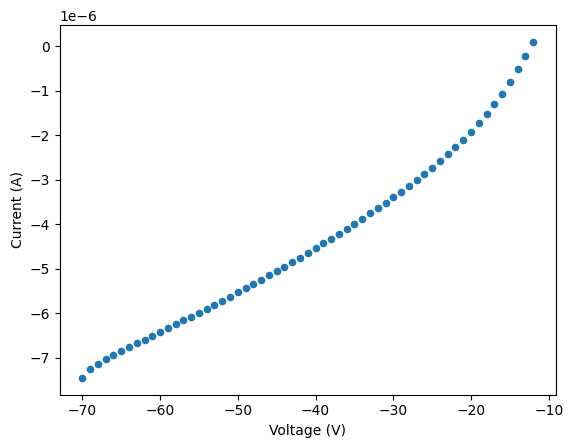

In [30]:
dataframes['216.9mtorr 1200V sweep -70 to +20.txt'].plot(x='Voltage (V)', y='Current (A)', kind='scatter')

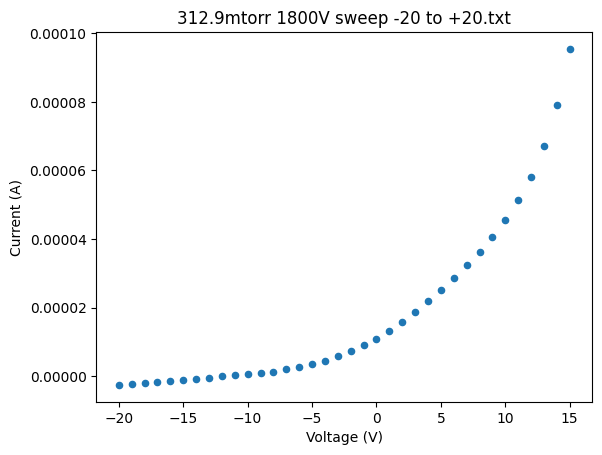

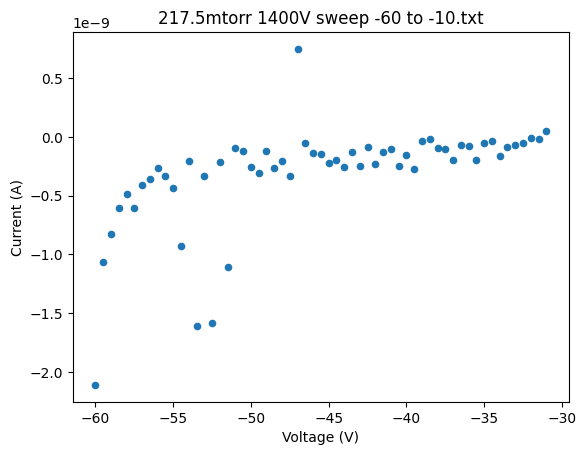

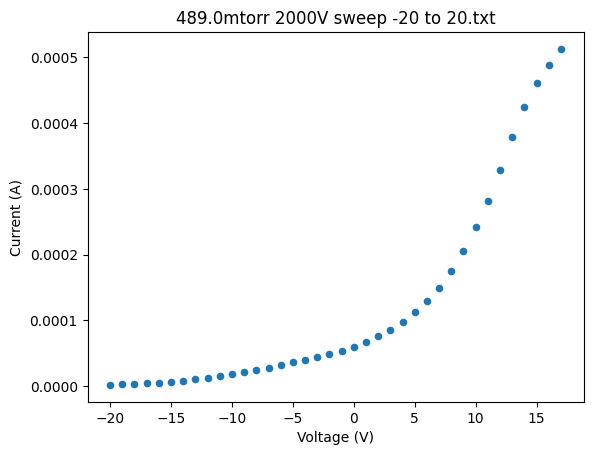

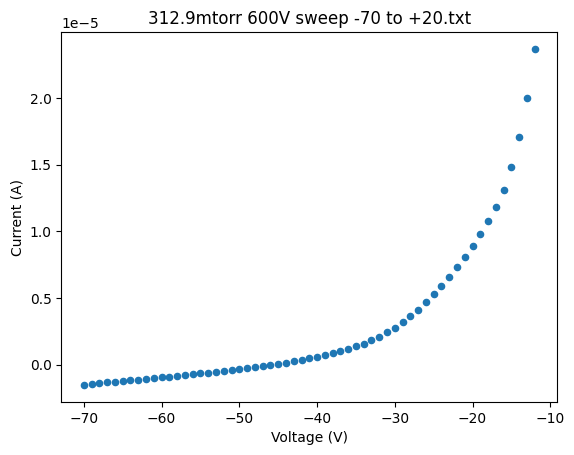

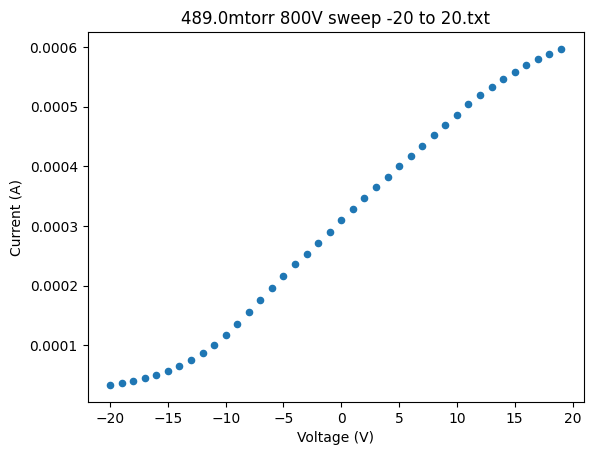

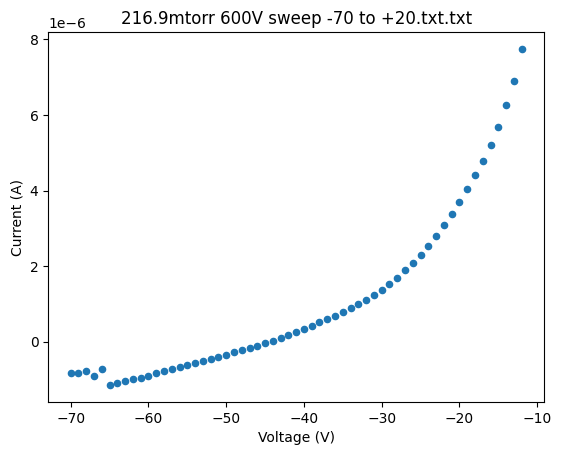

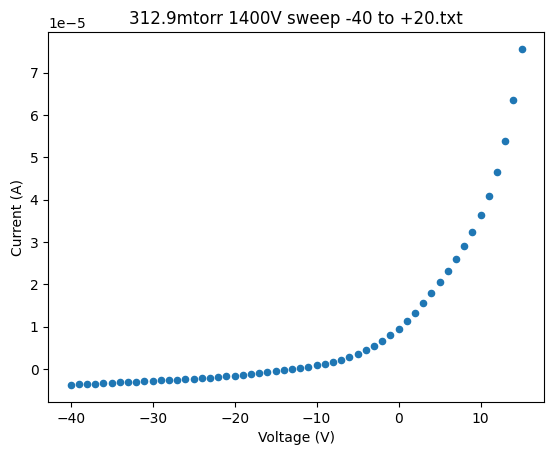

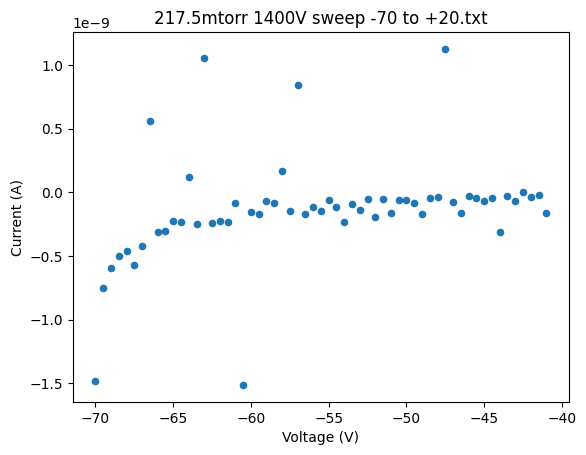

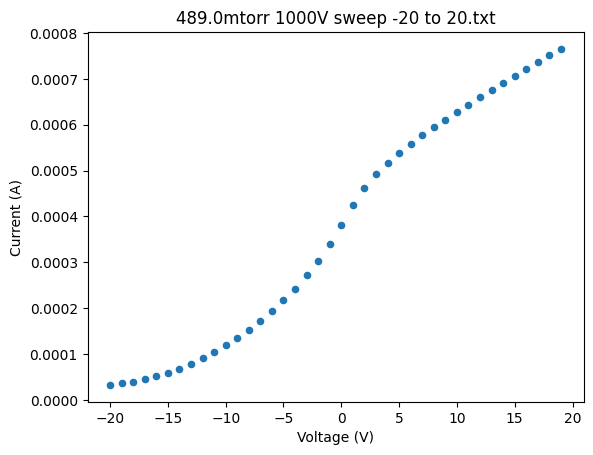

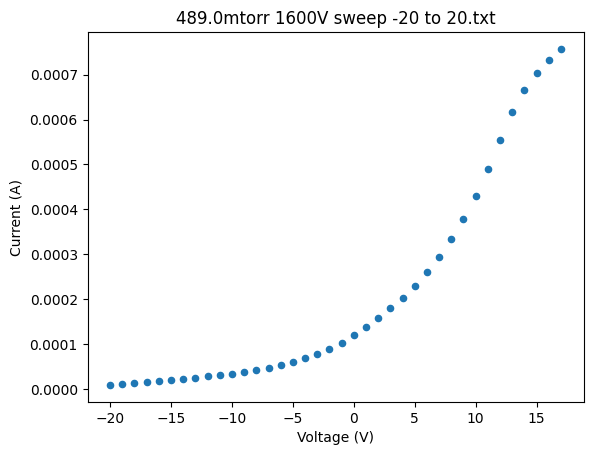

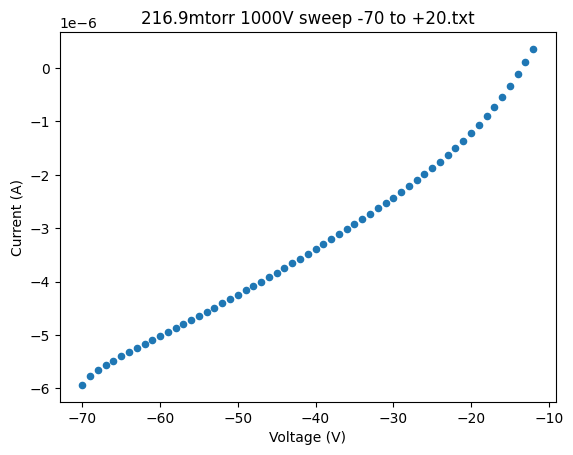

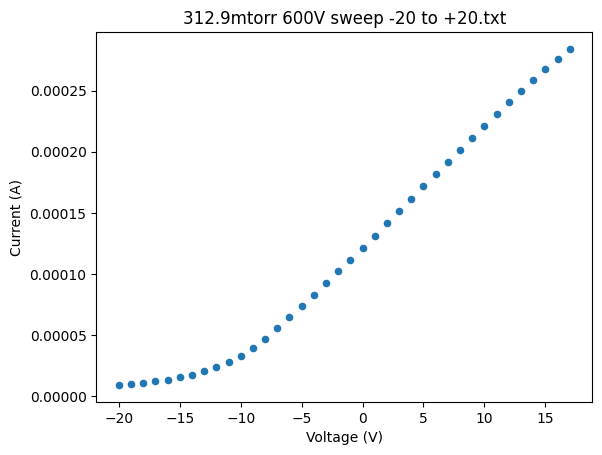

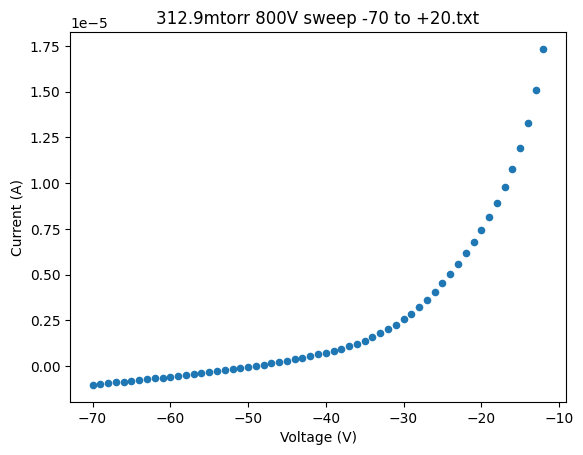

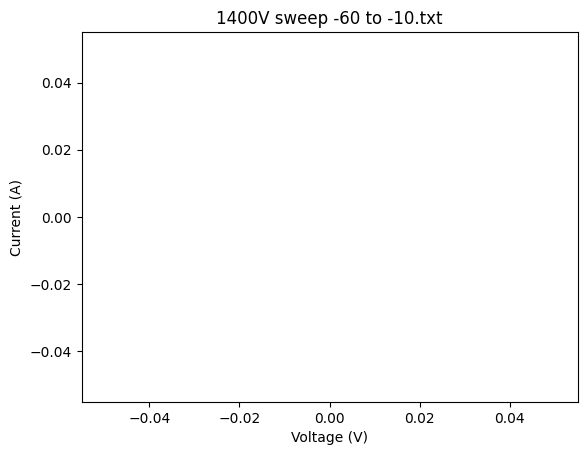

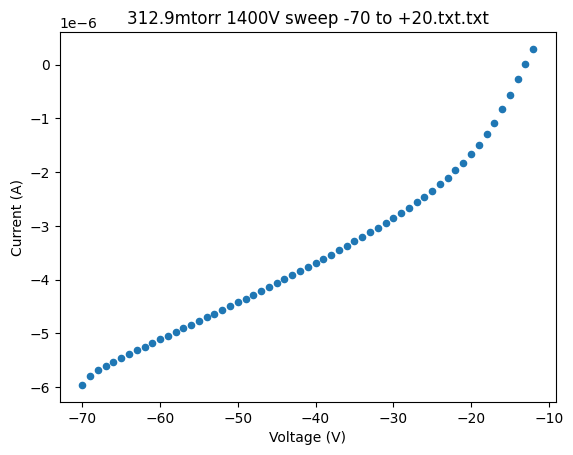

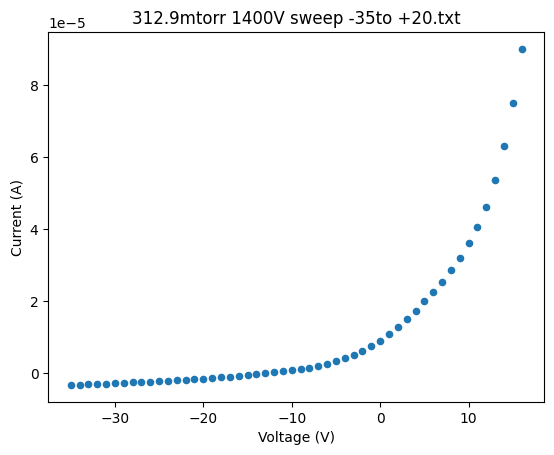

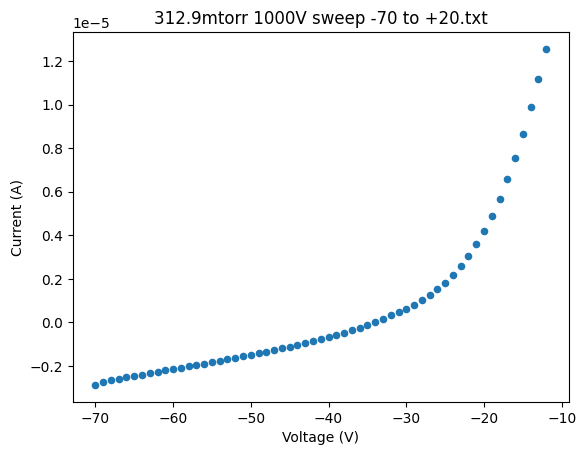

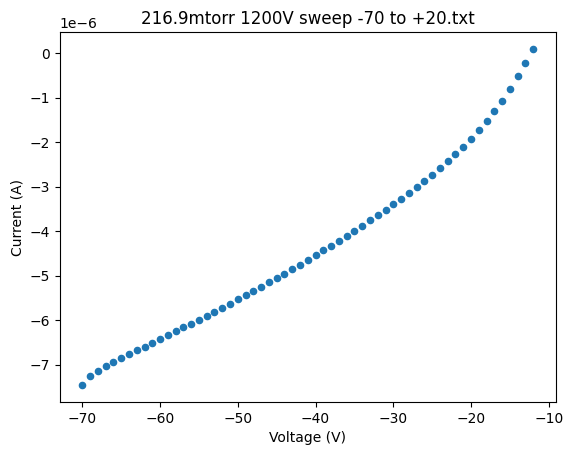

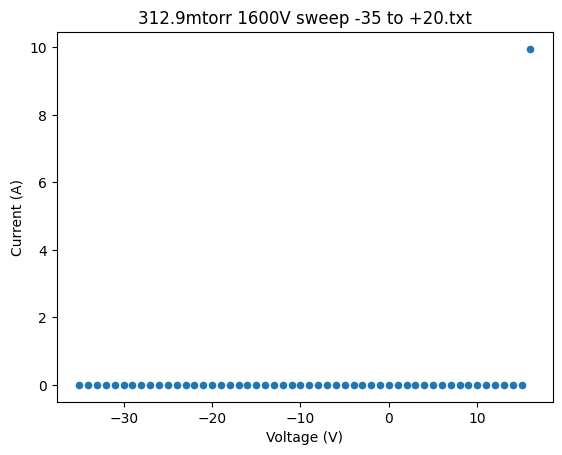

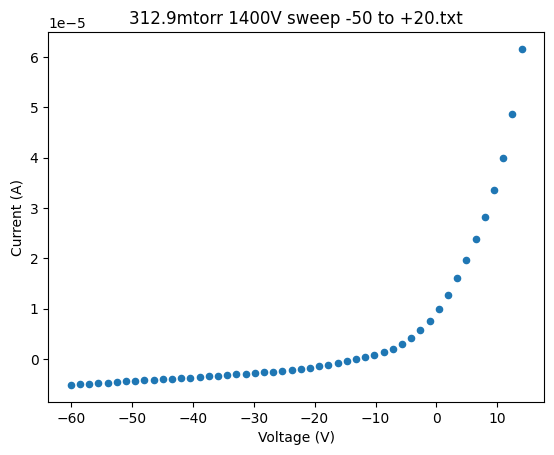

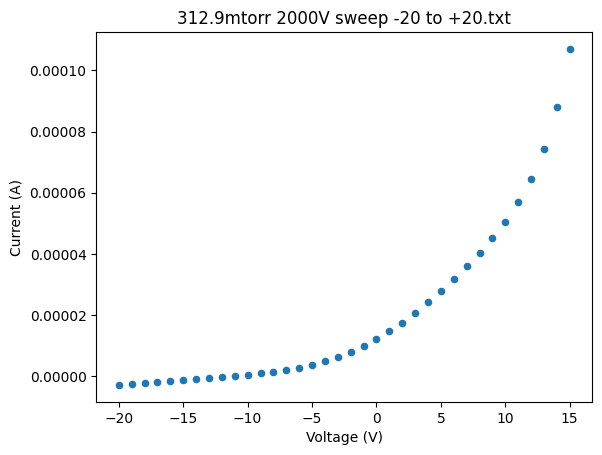

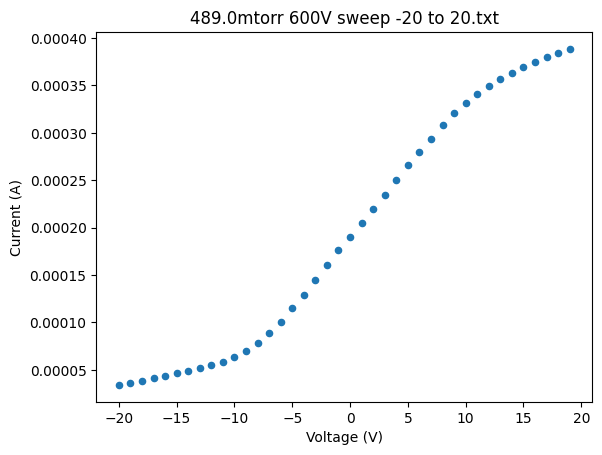

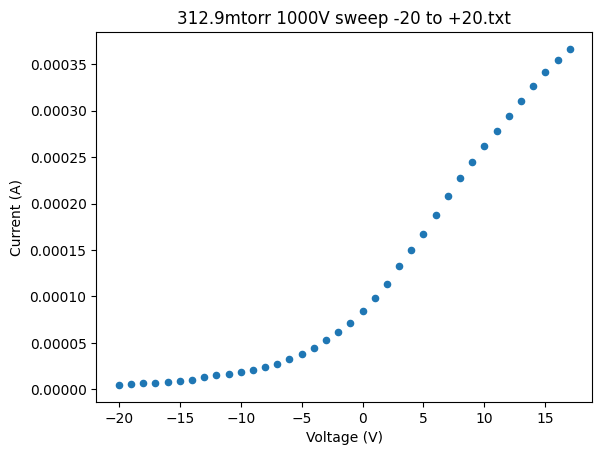

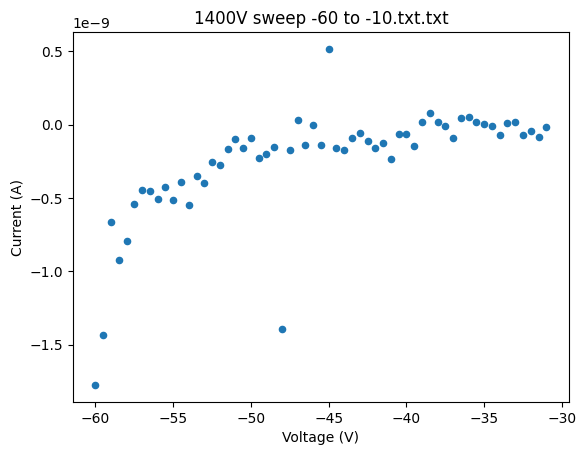

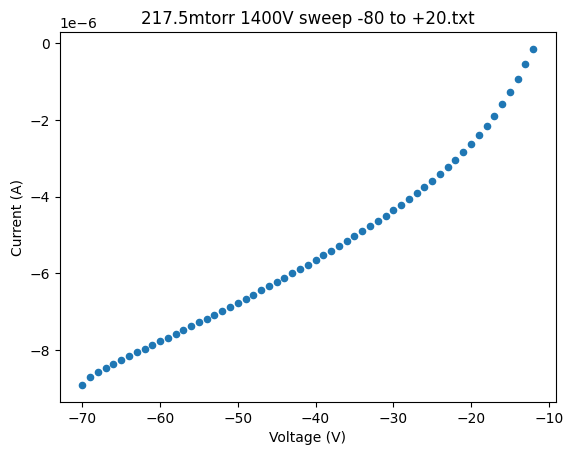

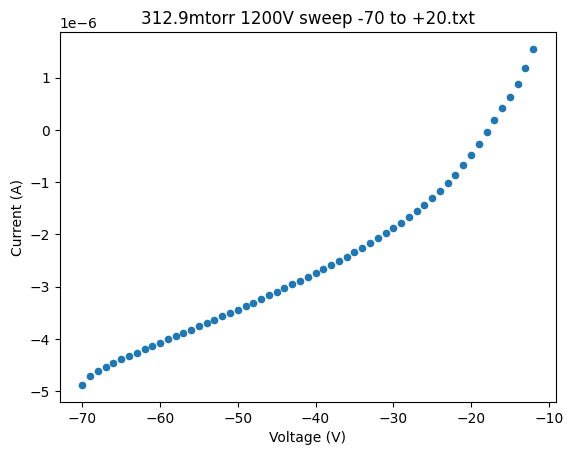

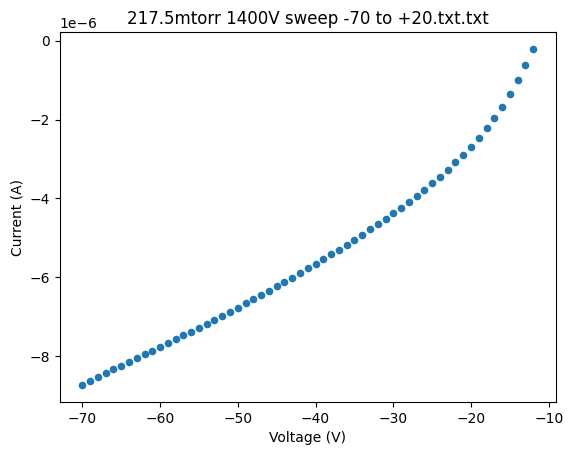

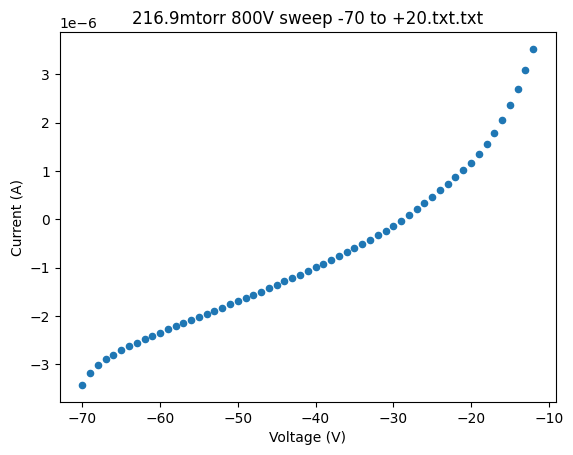

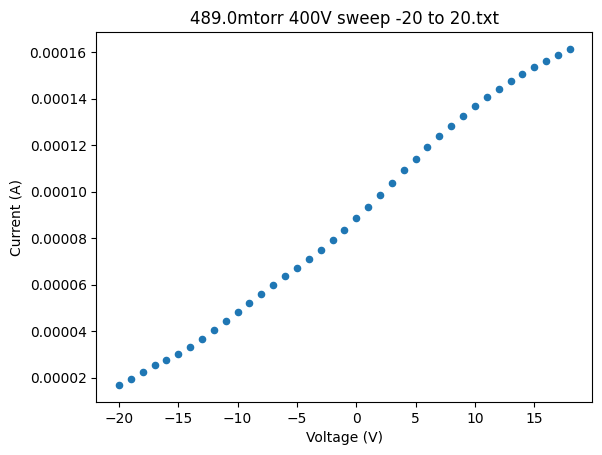

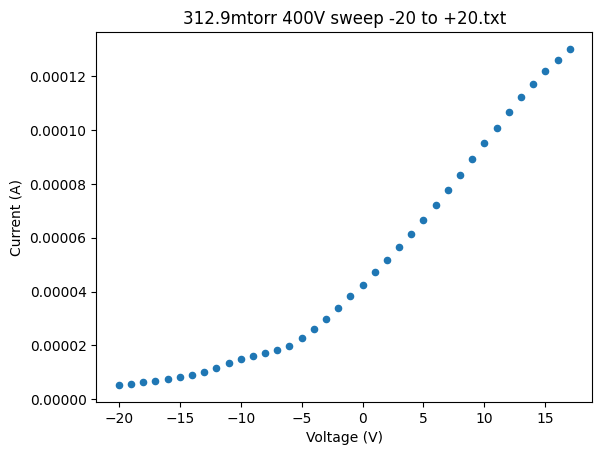

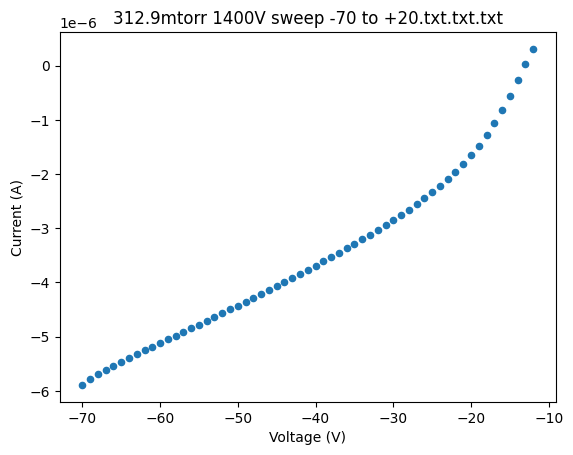

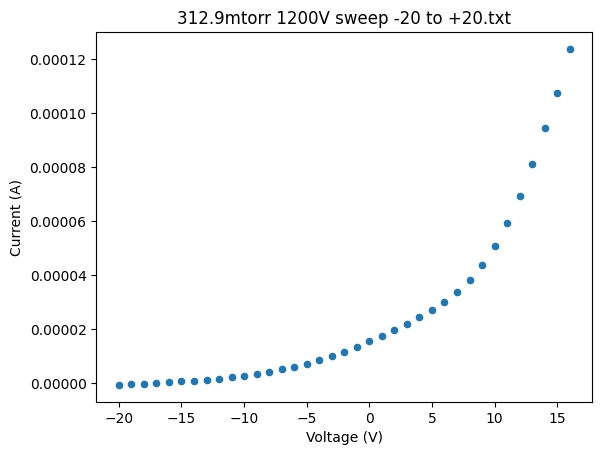

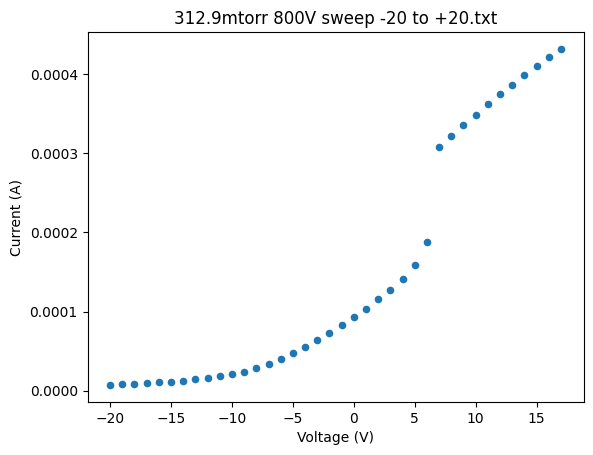

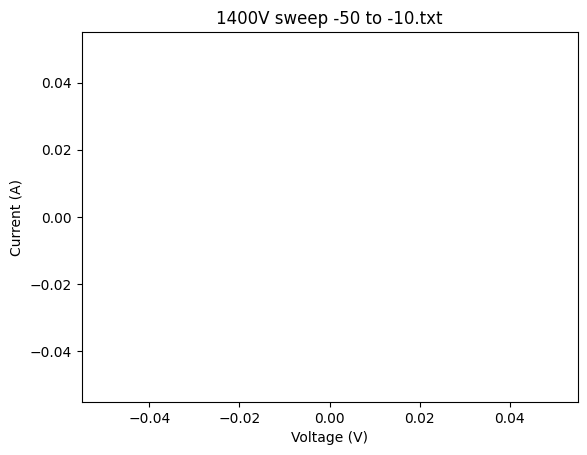

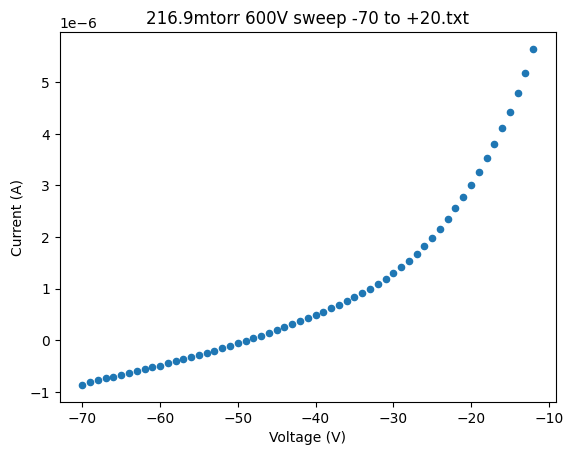

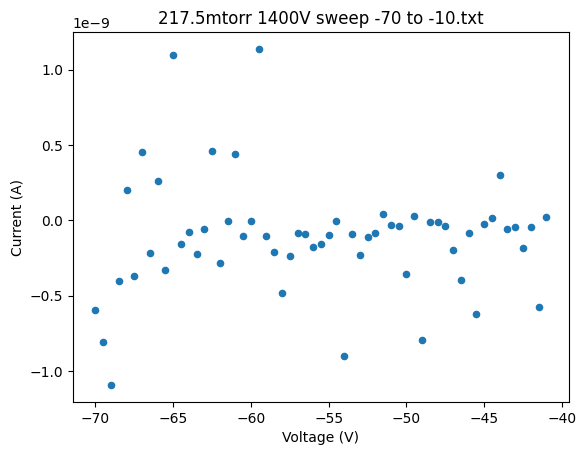

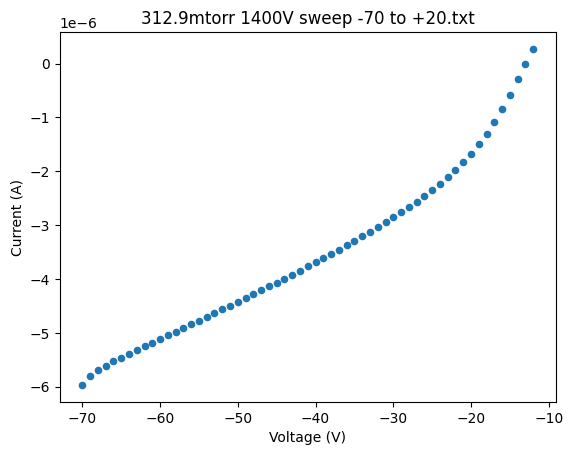

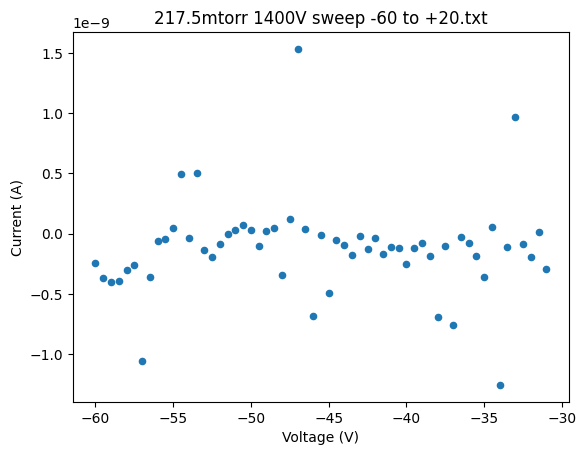

In [33]:
for key, item in dataframes.items():
  try:
    item.plot(x='Voltage (V)', y='Current (A)', kind='scatter')
    # plt.xlim(-380, -250)
    plt.title(key)
    # plt.xticks(np.linspace(-380, -250, 8))
    plt.show()
  except:
    continue


# Spectrum (Temperature)